In [157]:
"""
- Solución de ecuaciones diferenciales
    - Ecuaciones lineales
        - Ejemplo sin valores iniciales con Sympy
        - Ejemplo con valores iniciales con Sympy
        - Ejemplo con valores iniciales con Scipy
    - Ecuaciones no lineales    
"""

'\n- Solución de ecuaciones diferenciales\n    - Ecuaciones lineales\n        - Ejemplo sin valores iniciales con Sympy\n        - Ejemplo con valores iniciales con Sympy\n        - Ejemplo con valores iniciales con Scipy\n    - Ecuaciones no lineales    \n'

In [158]:
# Ec. Diferencial Lineal
## Ejemplo sin valores iniciales con Sympy

from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

t= symbols('t')
x = Function('x')
f = x(t).diff(t) + x(t) - sin(t)
f

x(t) - sin(t) + Derivative(x(t), t)

In [159]:

sol = dsolve(f)
sol

Eq(x(t), C1*exp(-t) + sin(t)/2 - cos(t)/2)

In [160]:
# Define the differential equation
f = Function('f')
# x = symbols('x')
t = symbols('t')
diff_eq = Eq(f(t).diff(t, t) - 2*f(t).diff(t) + f(t), sin(t))
diff_eq


Eq(f(t) - 2*Derivative(f(t), t) + Derivative(f(t), (t, 2)), sin(t))

In [161]:

# Solve the differential equation
sol = dsolve(diff_eq, f(t))
sol


Eq(f(t), (C1 + C2*t)*exp(t) + cos(t)/2)

In [162]:

# Substitute t with 0 and f(0) with x0 in the solution
x0 = symbols('x0')
sol_at_t0 = sol.subs({t: 0, f(0): x0})

sol_at_t0

Eq(f(0), C1 + 1/2)

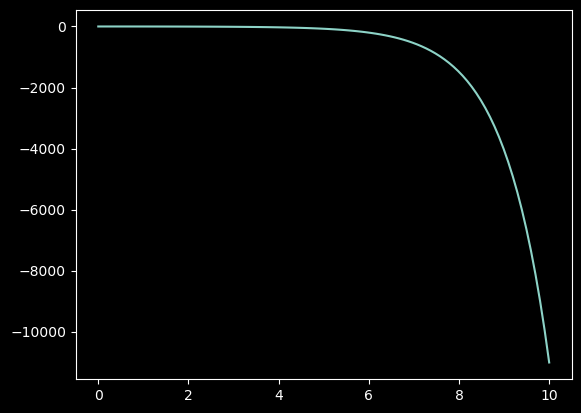

In [163]:
# Ejemplo con valores iniciales con Scipy

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def model(t, y):
    return y - np.sin(t)

t_span = [0, 10]

sol = solve_ivp(model, t_span, [0], t_eval=np.linspace(0, 10, 100))

plt.plot(sol.t, sol.y[0])

plt.show()


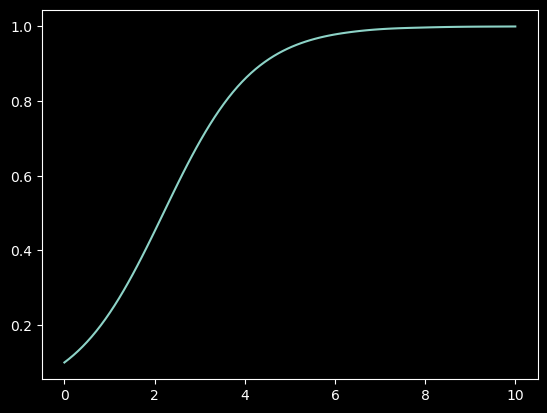

In [164]:
# Ec. Diferencial No Lineal

from scipy.integrate import solve_ivp
import numpy as np

def model(t, y):
    return y - y**2

t_span = [0, 10]

sol = solve_ivp(model, t_span, [0.1], t_eval=np.linspace(0, 10, 100))

plt.plot(sol.t, sol.y[0])

plt.show()


In [165]:
from sympy import symbols, Function, dsolve, Eq, sqrt, simplify

# Define symbols
t = symbols('t')
v = Function('v')(t)
y = Function('y')(t)
m, g, k = symbols('m g k')

# Differential equations
dvdt = -g + (k / m) * v 
dydt = v


# Solve differential equation for velocity (Modified)
eq_v = Eq(v.diff(t), dvdt)
eq_v


Eq(Derivative(v(t), t), -g + k*v(t)/m)

In [166]:

sol_v = dsolve(eq_v, v)
sol_v


Eq(v(t), C1*exp(k*t/m) + g*m/k)

In [167]:

# Simplify solution
sol_v = simplify(sol_v.rhs)  # Extract the right-hand side directly
sol_v

C1*exp(k*t/m) + g*m/k

In [168]:

# Solve for position (Modified)
eq_y = Eq(y.diff(t), sol_v)
eq_y

Eq(Derivative(y(t), t), C1*exp(k*t/m) + g*m/k)

In [169]:

sol_y = dsolve(eq_y, y)
sol_y


Eq(y(t), C1*m*exp(k*t/m)/k + C2 + g*m*t/k)

In [170]:

# Simplify solution
sol_y = simplify(sol_y.rhs)

print("Velocity solution:")
print(sol_v)

print("\nPosition solution:")
print(sol_y)



Velocity solution:
C1*exp(k*t/m) + g*m/k

Position solution:
(C1*m*exp(k*t/m) + C2*k + g*m*t)/k


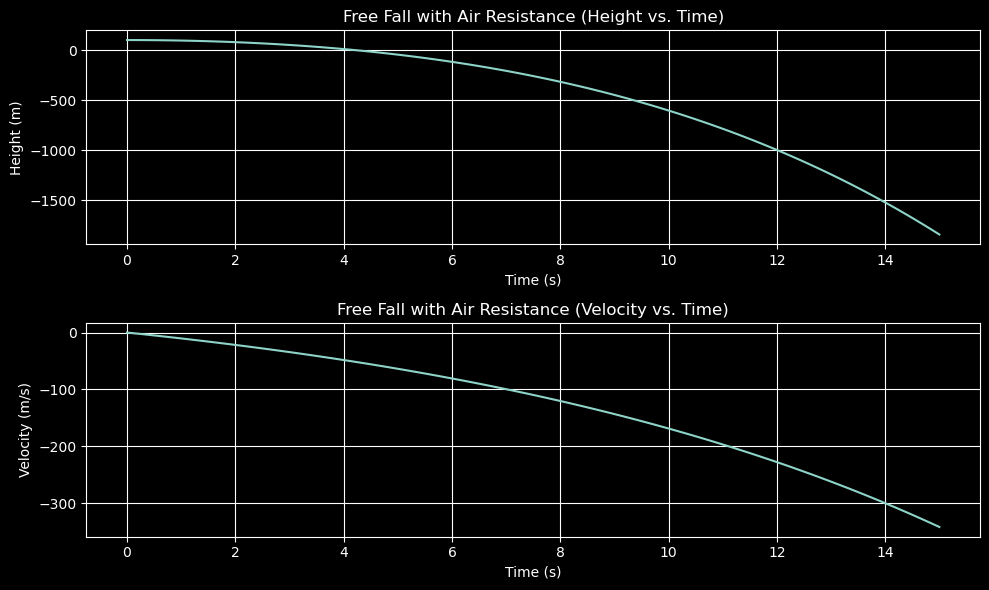

In [171]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # mass (kg)
g = 9.81  # acceleration due to gravity (m/s^2)
k = 0.1   # air resistance coefficient (kg/m)

# Initial conditions
v0 = 0.0  # initial velocity (m/s)
y0 = 100.0  # initial height (m)

# Time span
t_span = (0, 15)  # time interval for simulation

# Define the differential equation function
def freefall_air_resistance(t, y):
    v, y = y  # unpack velocity and height
    dvdt = -g + (k / m) * v  # calculate acceleration
    dydt = v  # calculate velocity
    return [dvdt, dydt]

# Solve the differential equation
sol = solve_ivp(freefall_air_resistance, t_span, [v0, y0], t_eval=np.linspace(0, 15, 100))

# Extract results
t = sol.t
v = sol.y[0]
y = sol.y[1]

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Free Fall with Air Resistance (Height vs. Time)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Free Fall with Air Resistance (Velocity vs. Time)')
plt.grid(True)

plt.tight_layout()
plt.show()